# Homework 3

Unzip the zip file that contains the homework and the data associated with it, then run the code below:

In [339]:
import os
import sys
import hashlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

assert os.path.exists('../homeworks/HW3.ipynb')
assert os.path.exists('../data/hw3-task2-data.csv')
assert os.path.exists('../data/BreastTissue.xlsx')



## Task 1

Run the code below before you start working on your homework:


In [340]:
info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/'+name,'w') as f:
    f.write(info)

In [341]:
with open('../other/'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/'+name)

## Task 2

Using [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function read the data file '`data/hw3-task2-data.csv`' below:

In [342]:
task2_data = pd.read_csv("../data/hw3-task2-data.csv")# <- YOUR CODE GOES HERE
task2_data.head(10)

,x,y,c
1,-2.873979,-1.977563,0
2,-1.939798,-2.758217,0
3,-1.954560,2.657385,0
4,-3.284104,1.952121,0
5,-1.954758,2.351581,0
6,-1.133108,2.649699,0
7,-0.063933,-2.703307,0
8,2.272370,-1.921207,0
9,2.627003,-2.284012,0
10,1.695585,-3.618690,0


Now, using the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `sklearn`, create training and testing data subsets. Use 25% of your data as test, and remaining as your training data sets.

In [343]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(task2_data.iloc[:,0:1], task2_data.iloc[:,2], test_size=0.25)# <- YOUR CODE GOES HERE

Now, using [`sklearn.cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) create a k-means model below for 2 clusters, train it and use the test dataset to make predictions:

In [344]:
model = KMeans(n_clusters = 2) # <- YOUR CODE GOES HERE
model.fit(Xtest) # <- YOUR CODE SHOULD REPLACE ?????
predictions = model.predict(Xtest) # <- YOUR CODE GOES HERE

Now, using [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) construct the confusion matrix, and calculate your accuracy using sklearn's [cross-validation tools](http://scikit-learn.org/stable/modules/model_evaluation.html).  Try to repeat your experiments until you reach a reasonable accuracy result.

In [345]:
import sklearn
import matplotlib.pyplot as plot
from sklearn.metrics import accuracy_score
cm = confusion_matrix(Ytest,predictions) # <- YOUR CONFUSION MATRIX CODE GOES HERE
accuracy = sklearn.metrics.accuracy_score(Ytest,predictions)# <- YOUR ACCURACY CODE GOES HERE
accuracy


0.5840336134453782

As you observed, your accuracy is really terrible.  Inspect the data, make a plot and observe that k-means **will never** produce a usable estimate of clusters for this dataset:

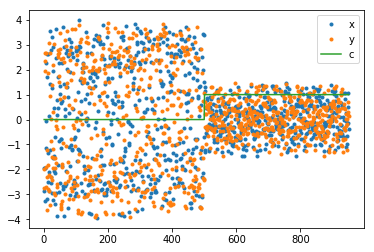

In [346]:
## Do your inspections and plots in this cell
#Xtest.describe()
task2_data.plot(style=['.','.'])
plot.show()

In this cell, write an explanation as to why the k-means algorithm will never work:

### Your explanation goes below

kmean algoritmasi bu örnekte verilen 2 ayrı özellik x ve y için yoğunlaştığı bölgeye göre bir merkez seçiyor ve seçilen herhangi bir örneklemin konumunu bu merkezlere olan uzaklıgını ölçerek, örneklemin 0 mı 1 mi olduguna karar veriyor.Karar verirken de merkezler yakınlıgına bakılıyor.. Bu data setinde x ve y data için merkezler birbirine çok yakın oldugundan algorithmanın doğru tahmin etmesi zordur.  

## Task 3

Now, instead of using k-means model, let us use a k-nn model.  Below, using [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) create a model, train it and use the test dataset to make predictions.  Use the same train-test datasets we created earlier.  You are free to choose the parameters 'k' and the 'metric':

In [347]:
model = KNeighborsClassifier(n_neighbors = 5,metric = "manhattan")
model.fit(Xtrain,Ytrain)
predictions =  model.predict(Xtest)# <- YOUR CODE GOES HERE

Now, construct the confusion matrix, and calculate your accuracy.

In [348]:
cm = confusion_matrix(Ytest,predictions) # <- YOUR CONFUSION MATRIX CODE GOES HERE
accuracy = accuracy_score(Ytest,predictions)# <- YOUR ACCURACY CODE GOES HERE %%%???TEKRRAAAR BAKK
accuracy

0.8235294117647058

Accuracy is much better. Explain below why, in theory, this method does produce better results in this case:

### Your explanation goes below

knn algoritması ile secilen bir datanın kendisine yakın k tane komsusuna olan uzaklıgı kıyaslanarak , kendisine yakın olan data ile ayni sınıflandırır.Bu yaklaşım bu verı kümesi için daha iyi sonuc verir çünkü her iki veri bir yerde yogunlaşmasına ragmen grafikte de görüleceği gibi turuncular birbirine ve kırmızılar birbirine daha yakın gözükmektedir ..Bu da bu algoritmanın kmeans göre daha iyi sonuç vermesini sağlamaktadır.

## Task 4

Using [`pandas.read_excel`]() read the [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx'

In [349]:
data = pd.read_excel('../data/BreastTissue.xlsx')# your code goes here
data.head(10)
xs = data.iloc[:,1:]
ys = data.iloc[:,0]
#data.describe()

Now, create a k-nn model, train and test it. Your dependent variable is `Class` column. You are free to choose `k` and the `metric`:

In [350]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs,ys)# CODE GOES HERE

In [351]:
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(Xtrain,Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest,predicted)
accuracy = accuracy_score(Ytest,predicted)
print(cm)
print(accuracy)

[[3 0 2 0 0 0]
 [0 6 0 0 0 0]
 [1 2 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 3 2 0]
 [0 2 0 1 1 2]]
0.5185185185185185


Now, using [feature scaling](http://scikit-learn.org/stable/modules/preprocessing.html), specifically, using [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) normalize the feature columns `xs` we defined earlier below:

In [352]:
scaler = StandardScaler()
scaler.fit(Xtrain)
xs =  scaler.fit_transform(xs)# your code goes here

Now, repeat mdoel construction, training, testing and accuracy calculation

In [353]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs,ys)
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(Xtrain,Ytrain)
predicted = model.predict(Xtest)
cm = confusion_matrix(Ytest,predicted)
accuracy = accuracy_score(Ytest,predicted)
print(cm)
print(accuracy)

[[7 0 0 0 0 0]
 [0 3 0 0 0 1]
 [0 0 2 0 0 0]
 [0 1 0 2 0 1]
 [0 0 0 0 2 1]
 [0 2 0 1 2 2]]
0.6666666666666666


Why did we get better results? Explain below:

### Your explanation goes below

Scaler ile birbirinden uzak olan aynı data verilerini birbirine yaklaştırıyoruz.Bu da algoritmanın daha doğru sonuç vermesini sağladı.

## Task 5

Now, construct a k-nn model for the same dataset [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx' first using the original data, then again, using feature scaling. At the end compare accuracies.

In [362]:
df = pd.read_excel('../data/BreastTissue.xlsx')
xs = data.iloc[:,1:]
ys = data.iloc[:,0]

In [363]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys)

In [364]:
classifier = KMeans(n_clusters=6,random_state=1)
classifier.fit(Xtest)
predicted = classifier.predict(Xtest)
labels = {"car":0, "fad":1, "mas":2,"gla":3,"con":4,"adi":5}
real = Ytest.map(lambda x: labels[x])
print(confusion_matrix(real,predicted))
accuracy_score(real,predicted)

[[1 0 3 0 1 0]
 [5 0 0 0 0 0]
 [5 0 0 0 0 0]
 [3 0 0 0 0 0]
 [1 0 2 0 1 1]
 [0 1 0 2 1 0]]


0.07407407407407407

In [365]:
scaler = StandardScaler()
scaler.fit(Xtrain)
xs = scaler.fit_transform(xs)# your code goes here

In [366]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys)

In [367]:
classifier = KMeans(n_clusters=6,random_state=1)
classifier.fit(Xtest)
predicted = classifier.predict(Xtest)
labels = {"car":0, "fad":1, "mas":2,"gla":3,"con":4,"adi":5}
real = Ytest.map(lambda x: labels[x])
print(confusion_matrix(real,predicted))
accuracy_score(real,predicted)

[[0 0 0 0 0 1]
 [0 5 0 0 0 0]
 [0 1 0 1 0 5]
 [0 0 0 0 0 3]
 [1 1 0 0 2 0]
 [4 0 3 0 0 0]]


0.25925925925925924